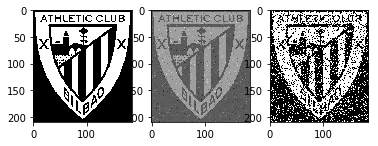

In [57]:
import numpy as np
import matplotlib.pyplot as plt
#from scipy.misc import imread
import matplotlib.image as mpimg

def add_gaussian_noise(im,prop,varSigma):
    N = int(np.round(np.prod(im.shape)*prop))
    
    
    index = np.unravel_index(np.random.permutation(np.prod(im.shape))[1:N],im.shape)
    e = varSigma*np.random.randn(np.prod(im.shape)).reshape(im.shape)
    im2 = np.copy(im).astype('float')
    im2[index] += e[index]
    return im2
def add_saltnpeppar_noise(im,prop):
    N = int(np.round(np.prod(im.shape)*prop))
    index = np.unravel_index(np.random.permutation(np.prod(im.shape))[1:N],im.shape)
    im2 = np.copy(im)
    im2[index] = 1-im2[index]
    return im2

# proportion of pixels to alter
prop = 0.15
varSigma = 0.8
im = mpimg.imread('image.png')
#im = im/255
#print(np.unique(im))
im = np.squeeze(im[:,:,0])

im3 = add_saltnpeppar_noise(im,prop)
for r in range(0,im.shape[0]):
    for c in range(0,im.shape[1]):
        if im[r,c] == 0:            # We want our binary images to be 1 or -1 to use them in the algorithms
            im[r,c] = -1
        if im3[r,c] == 0:
            im3[r,c] = -1

im2 = add_gaussian_noise(im,prop,varSigma)
fig = plt.figure()
ax = fig.add_subplot(131)
ax.imshow(im,cmap='gray')
ax2 = fig.add_subplot(132)
ax2.imshow(im2,cmap='gray')

ax3 = fig.add_subplot(133)
ax3.imshow(im3,cmap='gray')

def neighbours(i,j,M,N,size=4):
    if size==4:
        if (i==0 and j==0):
            n=[(0,1), (1,0)]
        elif i==0 and j==N-1:
            n=[(0,N-2), (1,N-1)]
        elif i==M-1 and j==0:
            n=[(M-1,1), (M-2,0)]
        elif i==M-1 and j==N-1:
            n=[(M-1,N-2), (M-2,N-1)]
        elif i==0:
            n=[(0,j-1), (0,j+1), (1,j)]
        elif i==M-1:
            n=[(M-1,j-1), (M-1,j+1), (M-2,j)]
        elif j==0:
            n=[(i-1,0), (i+1,0), (i,1)]
        elif j==N-1:
            n=[(i-1,N-1), (i+1,N-1), (i,N-2)]
        else:
            n=[(i-1,j), (i+1,j), (i,j-1), (i,j+1)]
            
        n = np.array(n)
        return n

    if size==8:
        if (i==0 and j==0):
            n=[(0,1), (1,0), (1,1)]
        elif i==0 and j==N-1:
            n=[(0,N-2), (1,N-1), (1,N-2)]
        elif i==M-1 and j==0:
            n=[(M-1,1), (M-2,0),(M-2,1)]
        elif i==M-1 and j==N-1:
            n=[(M-1,N-2), (M-2,N-1),(M-2,N-2)]
        elif i==0:
            n=[(0,j-1), (0,j+1), (1,j),(1,j-1),(1,j+1)]
        elif i==M-1:
            n=[(M-1,j-1), (M-1,j+1), (M-2,j),(M-2,j-1),(M-2,j+1)]
        elif j==0:
            n=[(i-1,0), (i+1,0), (i,1),(i-1,1),(i+1,1)]
        elif j==N-1:
            n=[(i-1,N-1), (i+1,N-1), (i,N-2),(i-1,N-2),(i+1,N-2)]
        else:
            n=[(i-1,j), (i+1,j), (i,j-1), (i,j+1),(i-1,j-1),(i-1,j+1),(i+1,j-1),(i+1,j+1)]
        n = np.array(n)
        return n

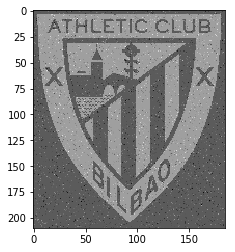

-3.6816023656594026
-1.0


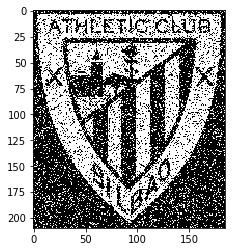

In [58]:
plt.imshow(im2,cmap='gray')
plt.show()
plt.imshow(im3,cmap='gray')
print(im2.min())
print(im3.min())

In [59]:
def ising(y,niterations):
    rows = y.shape[0]
    cols = y.shape[1]
    x = np.matrix.copy(y)
    weight = 0.05
    for tau in range(0,niterations):
        for r in range(0,rows):
            for c in range(0,cols):
                py_x1 = np.exp(-(1-y[r][c])**2)
                py_xm1 = np.exp(-(-1-y[r][c])**2)
                neigbs = neighbours(r,c,rows,cols,8)
                p1_nei = 0
                pm1_nei = 0
                aux = 0
                for j in range(0,neigbs.shape[0]):
                    aux += weight*x[neigbs[j][0]][neigbs[j][1]]
                    p1_nei = np.exp(-(8-aux)**2)
                    pm1_nei = np.exp(-(-8-aux)**2)

                pxi1 = py_x1*p1_nei
                pxi1 = pxi1 /(pxi1+py_xm1*pm1_nei)
                t = np.random.uniform(0,1)
                if pxi1 > t:
                    x[r,c] = 1
                else:
                    x[r,c] = -1
    return x 

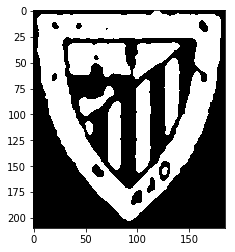

In [62]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
denoised = im3;
for i in range(1, 101):
    denoised = ising(denoised,1)
    #ax = fig.add_subplot(2, 5, i)
    #ax.imshow(denoised,cmap='gray')
    if(i==100):
        plt.imshow(denoised,cmap='gray')
        plt.show()